KNN NeighborsRegressor

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv('death_clean.csv')
df.head()

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...


In [31]:
x = df[['Cause', 'Type']]
y = df[['Total Deaths']]

x_encoded = pd.get_dummies(x, columns=['Cause', 'Type'])

scaler = StandardScaler()
y_norm = scaler.fit_transform(y).ravel()

x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_norm, test_size=0.3, random_state=42)

In [33]:
k = 3
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
y_pred

array([ 8.32767039e-01, -2.28916480e-02, -2.69716269e-01, -1.73337131e-01,
        2.96616947e-03,  2.96616947e-03, -2.28916480e-02, -3.40237590e-01,
       -4.90683073e-01, -2.88521955e-01, -5.40047997e-01,  2.02692806e+00,
       -2.28916480e-02,  2.40387948e-01,  1.03962958e+00, -2.28916480e-02,
       -3.40237590e-01,  2.02692806e+00, -3.21431904e-01, -2.48559873e-01,
       -4.01356067e-01,  1.20501703e-01,  1.60463785e-01, -5.28294444e-01,
       -2.28916480e-02, -3.56692564e-01, -5.40047997e-01, -3.23782615e-01,
       -2.43858452e-01, -2.43858452e-01, -5.21242312e-01, -2.90872665e-01,
       -3.40237590e-01, -2.28916480e-02, -3.12029061e-01, -2.28916480e-02,
        2.02692806e+00,  1.20501703e-01, -3.04976929e-01, -3.04976929e-01,
        8.32767039e-01, -5.40047997e-01, -3.19081193e-01, -2.28916480e-02,
       -3.12029061e-01,  2.56842923e-01,  2.96616947e-03, -2.43858452e-01,
       -4.06057489e-01, -2.43858452e-01, -4.01356067e-01, -4.67175966e-01,
       -5.40047997e-01, -

In [34]:
score = knn_model.score(x_test, y_test)
print(f'K-Nearest Neighbors Score : {score:.2f}')

K-Nearest Neighbors Score : 0.63


In [35]:
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_pred_orig = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()

results_df = pd.DataFrame({
    'Actual Total Deaths': y_test_orig,
    'Predicted Total Deaths': y_pred_orig
})

results_df

,Actual Total Deaths,Predicted Total Deaths
0,99.0,196.000000
1,35.0,74.666667
2,34.0,39.666667
3,49.0,53.333333
4,42.0,78.333333
...,...,...
160,129.0,210.333333
161,184.0,96.000000
162,0.0,3.666667
163,0.0,20.333333


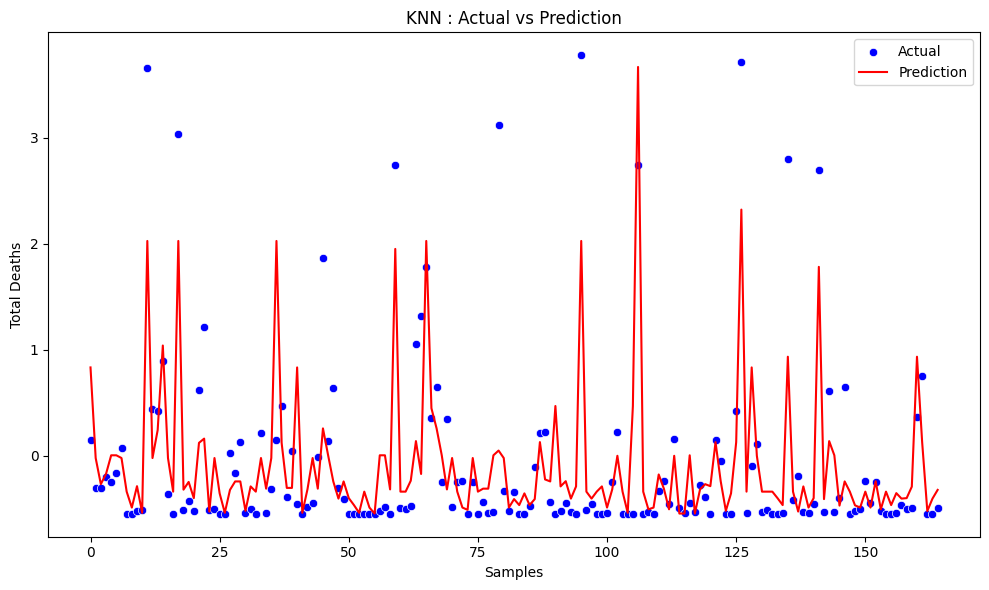

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(y_test)), y=y_test, color='blue', label='Actual')
sns.lineplot(x=range(len(y_test)), y=y_pred, color='red', label='Prediction')

plt.xlabel('Samples')
plt.ylabel('Total Deaths')
plt.title('KNN : Actual vs Prediction')
plt.legend()
plt.tight_layout()
plt.show()


KNN NeighborsClassifier

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

df = pd.read_csv("penyakit_jantung.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,female,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,female,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,male,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,female,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,male,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

X = df.drop(columns=['target']) 
y = df['target'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1])

In [41]:
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

results_df

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
86,0,0
87,1,1
88,1,1
89,1,1


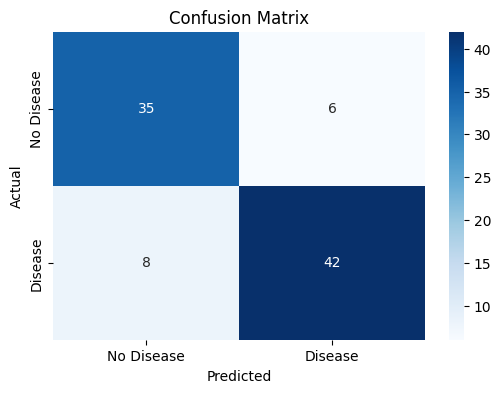

In [42]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
score = knn.score(X_test, y_test)
print(f'Akurasi: {score:.2f}')

Akurasi: 0.85
